In [1]:
import sys
import os
from pathlib import Path

# For Jupyter or interactive use — use current working directory as script base
notebook_path = Path().resolve()

# Assume notebook is in a subfolder of the repo — go up one level
file_dir = notebook_path.parent

# Set working directory to the repo root
os.chdir(file_dir)
print("Working directory set to:", Path.cwd())

sys.path.append(str(file_dir))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA


Working directory set to: /Users/melinatsotras/Desktop/submission


In [13]:
# Define file paths
human_zscore_path = f'{file_dir}/Enrichment_Analysis/human/enrichment_analysis_zscores_jorstad_5000maps.csv'
human_pval_path   = f'{file_dir}/Enrichment_Analysis/human/enrichment_analysis_fdr_pvalues_jorstad_5000maps.csv'

macaque_zscore_path = f'{file_dir}/Enrichment_Analysis/macaque/enrichment_analysis_zscores_macaque_5000maps.csv'
macaque_pval_path   = f'{file_dir}/Enrichment_Analysis/macaque/enrichment_analysis_fdr_pvalues_macaque_5000maps.csv'

# Load and index human data
zscores_human  = pd.read_csv(human_zscore_path).set_index('cell_type')
pvalues_human  = pd.read_csv(human_pval_path).set_index('cell_type')

# Load and index macaque data
zscores_macaque = pd.read_csv(macaque_zscore_path).set_index('cell_type')
pvalues_macaque = pd.read_csv(macaque_pval_path).set_index('cell_type')

# Display human zscores for inspection
display(zscores_human)
# Display macaque zscores for inspection
display(zscores_macaque)

,Visual,SomatoMotor,Dorsal Attention,Ventral Attention,Limbic,Frontoparietal,Default Mode
cell_type,,,,,,,
ASTRO,-1.386105,-1.205037,0.026888,0.745203,1.553155,-0.475081,1.307510
CHANDELIER,-1.017570,-1.038418,-0.792764,1.817734,2.478581,-0.554973,-0.117345
ENDO,0.818463,1.408802,0.206740,0.215712,-2.396949,-0.227875,-0.767833
L2_3_IT,0.098026,-2.170779,2.499428,-0.554673,-0.419932,2.161122,0.281452
L4_IT,2.308543,0.905493,-0.315745,-1.981883,-1.236086,-1.366831,-1.554530
L5_ET,-0.612551,1.568445,0.221492,0.210200,-0.980304,0.173619,-0.358274
L5_IT,-1.645084,-2.302217,1.970882,-1.064783,0.648819,2.981739,2.051551
L5_6_NP,-0.633768,-2.025400,-0.203675,1.421489,-0.105435,0.547171,2.333021
L6_CT,-0.610634,1.791592,-1.045323,1.366735,-0.484856,-1.434968,-0.163726


,Default Mode,Dorsal Attention,Frontoparietal,Limbic,SomatoMotor,Ventral Attention,Visual
cell_type,,,,,,,
ASC,1.658145,0.263114,0.768750,1.346785,1.558740,2.013131,-1.299070
EC,2.193893,-1.189224,-0.418461,1.374291,1.735689,-0.272734,-1.594866
MG,2.779995,-0.671872,0.440301,3.179816,1.147263,2.156988,-1.413760
OLG,-1.724670,0.770119,0.294050,-1.138006,0.831530,-0.886900,-0.094142
OPC,2.193631,-0.500877,0.735856,2.297959,0.916071,1.712318,-1.697831
VLMC,4.068769,-0.502690,-0.752696,1.316956,0.553193,-0.112967,-1.274484
L2,0.414911,0.517022,-0.877016,1.602467,-0.226608,2.018826,2.877603
L2_3,-1.797949,-0.300302,2.089183,-4.323889,-1.595742,-2.019686,2.957493
L2_3_4,1.195320,-0.559348,-2.259902,2.983315,-0.479724,0.661648,-0.182188


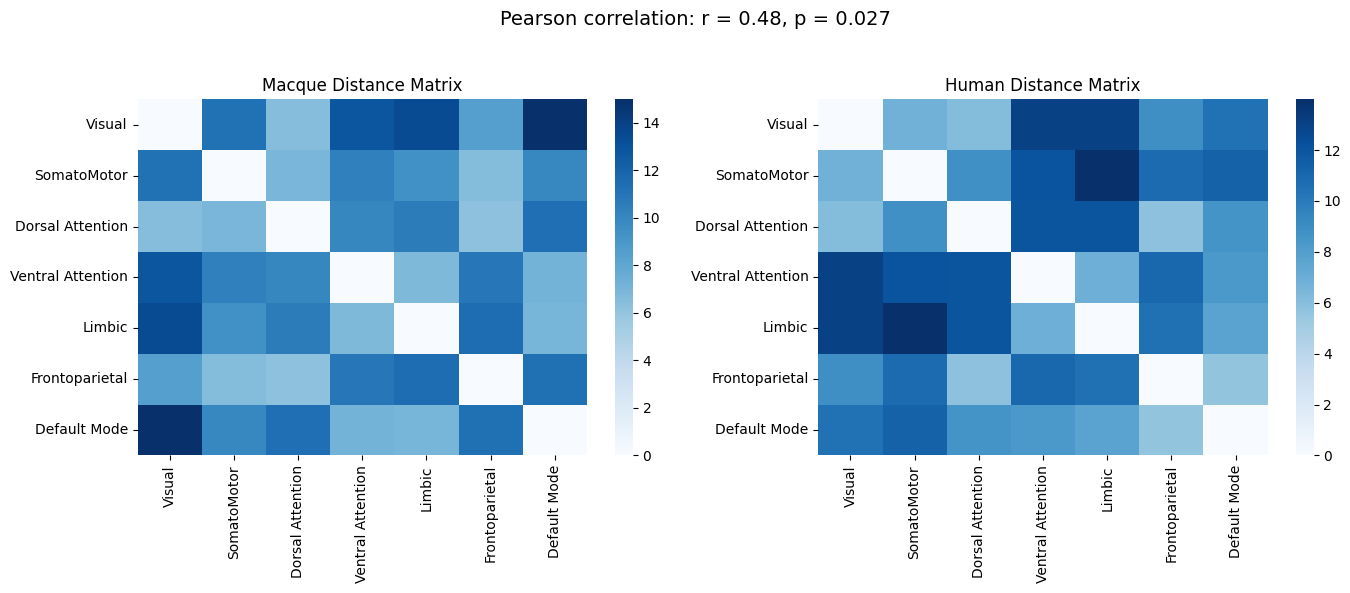

In [14]:
# Compute distance matrices
distance_hum = pairwise_distances(zscores_human.T, metric='euclidean')
distance_hum = pd.DataFrame(distance_hum, index=zscores_human.T.index, columns=zscores_human.T.index)

distance_nhp = pairwise_distances(zscores_macaque.T, metric='euclidean')
distance_nhp = pd.DataFrame(distance_nhp, index=zscores_macaque.T.index, columns=zscores_macaque.T.index)

# Align macaque matrix to human order
distance_nhp = distance_nhp.reindex(index=distance_hum.index, columns=distance_hum.columns)

# Extract lower triangles
lower_tri_indices = np.tril_indices_from(distance_hum, k=-1)
lower_tri_hum = distance_hum.values[lower_tri_indices]
lower_tri_nhp = distance_nhp.values[lower_tri_indices]

# Correlation
correlation, p_value = pearsonr(lower_tri_hum, lower_tri_nhp)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(distance_nhp, cmap='Blues', ax=axs[0])
axs[0].set_title("Macque Distance Matrix")

sns.heatmap(distance_hum, cmap='Blues', ax=axs[1])
axs[1].set_title("Human Distance Matrix")

plt.suptitle(f"Pearson correlation: r = {correlation:.2f}, p = {p_value:.3g}", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# Set number of PCA components
num_components = 3

# --- HUMAN PCA ---
# Fit PCA on transposed human z-scores (networks x cell types)
pca_human = PCA(n_components=num_components)
human_pca_scores = pca_human.fit_transform(zscores_human.T)

# Create DataFrame for PCA scores
human_pca_scores_df = pd.DataFrame(
    human_pca_scores,
    index=zscores_human.columns,
    columns=[f'PC{x}' for x in range(1, num_components + 1)]
)

# --- MACAQUE PCA ---
pca_macaque = PCA(n_components=num_components)
macaque_pca_scores = pca_macaque.fit_transform(zscores_macaque.T)

macaque_pca_scores_df = pd.DataFrame(
    macaque_pca_scores,
    index=zscores_macaque.columns,
    columns=[f'PC{x}' for x in range(1, num_components + 1)]
)

# --- Explained Variance ---
explained_variance_ratio_human = pca_human.explained_variance_ratio_
explained_variance_ratio_macaque = pca_macaque.explained_variance_ratio_

print("Explained Variance Ratio:")
print("Human:  ", explained_variance_ratio_human)
print("Macaque:", explained_variance_ratio_macaque)

Explained Variance Ratio:
Human:   [0.55681635 0.23720976 0.09351298]
Macaque: [0.58221422 0.19094371 0.09349137]


In [ ]:
# compare each PC across species
pcs_to_compare = ['PC1', 'PC2', 'PC3']

for pc in pcs_to_compare:
    flat_hum = human_pca_scores_df[[pc]].loc[macaque_pca_scores_df.index, :].to_numpy().flatten()
    flat_mac = macaque_pca_scores_df[[pc]].loc[macaque_pca_scores_df.index, :].to_numpy().flatten()
    
    corr, pval = pearsonr(flat_hum, flat_mac)
    print(f'{pc} Pearson r: {corr:.3f}, p-value: {pval:.3g}')


PC1 Pearson r: 0.851, p-value: 0.0152
PC2 Pearson r: 0.103, p-value: 0.827
PC3 Pearson r: 0.671, p-value: 0.0991


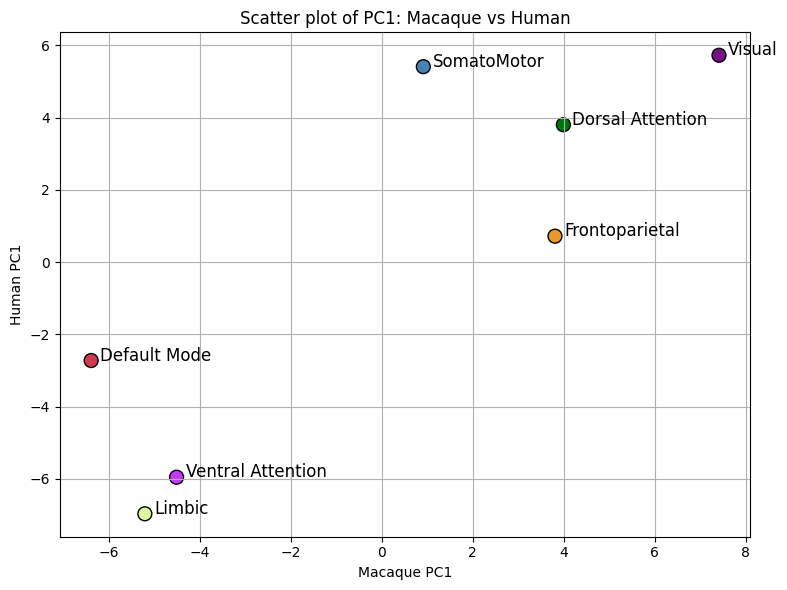

In [17]:
# Align indices between macaque and human PC1 data
common_idx = macaque_pca_scores_df.index.intersection(human_pca_scores_df.index)
human_pc1 = human_pca_scores_df.loc[common_idx, 'PC1']
macaque_pc1 = macaque_pca_scores_df.loc[common_idx, 'PC1']

# Define colors for each point (make sure color_dict keys match common_idx)
color_dict = {'Default Mode': '#cd3d4e', 
              'Dorsal Attention': '#00750e', 
              'Frontoparietal': '#e9982a', 
              'Limbic': '#dcf8a3', 
              'SomatoMotor': '#4682b3', 
              'Ventral Attention': '#c33af9', 
              'Visual': '#771185'}
color_values = [color_dict[i] for i in common_idx]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(macaque_pc1, human_pc1, c=color_values, s=100, edgecolor='k')

# Add text labels for each point, offset a bit for readability
for i, label in enumerate(common_idx):
    plt.text(macaque_pc1.iloc[i] + 0.2, human_pc1.iloc[i], label, fontsize=12)

plt.xlabel('Macaque PC1')
plt.ylabel('Human PC1')
plt.title('Scatter plot of PC1: Macaque vs Human')
plt.grid(True)
plt.tight_layout()
plt.show()
